In [1]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
import copy
from itertools import combinations

In [2]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else 'Not-Funded')

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
pubs_author_funder[pubs_author_funder.funder_country!=0]

,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3
...,...,...,...,...,...,...,...
7739777,65301283,"[Netherlands, Germany, Netherlands, United Sta...","[EU, Netherlands, Netherlands, Netherlands, Ne...",61,2016,0.000,0
7739778,65301284,"[Turkey, Canada, Canada]","[Canada, Turkey]",61,2016,0.000,0
7739779,65301319,[China],[China],14,2018,2.081,2
7739780,65301320,"[Russia, United Kingdom, Russia, Ukraine]",[United Kingdom],28,2017,0.000,0


In [10]:
author=pubs_author_funder[['id','funder_country']].explode('funder_country')

In [11]:
author.funder_country.unique().shape

(192,)

In [4]:
def intfund(fundlist):
    if len(set(fundlist))==1:
        return 1
    else:
        return 2

In [5]:
pubs_author_funder['funded']=pubs_author_funder['funder_country'].apply(
    lambda x:intfund(x) if x!=0 else 0)
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,funded
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,1
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,1
2,30574691,[Russia],[Russia],83,2009,0.312,4,1
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,1


In [45]:
fund_year=pubs_author_funder.groupby(['year','funded']).size().reset_index()
fund_year.columns=['year','funded','count']
fund_year.head()

,year,funded,count
0,2009,0,544610
1,2009,1,424342
2,2009,2,73172
3,2010,0,485759
4,2010,1,493385


In [37]:
fund_year = fund_year.pivot(index="year",columns="funded",values="count")
fund_year.columns=['not_funded','single_funded','int_funded']
fund_year.head()

,not_funded,single_funded,int_funded
year,,,
2009,544610,424342,73172
2010,485759,493385,98819
2011,473446,555962,117026
2012,484497,600306,125270
2013,496478,650464,130883


In [38]:
fund_year = fund_year.div(fund_year.sum(axis=1), axis=0)
fund_year

,not_funded,single_funded,int_funded
year,,,
2009,0.522596,0.407190,0.070214
2010,0.450627,0.457701,0.091672
2011,0.412973,0.484949,0.102078
2012,0.400387,0.496091,0.103523
2013,0.388534,0.509040,0.102426
2014,0.378852,0.520254,0.100894
2015,0.364295,0.531036,0.104669
2016,0.369377,0.527456,0.103167
2017,0.349753,0.546739,0.103508


<BarContainer object of 10 artists>

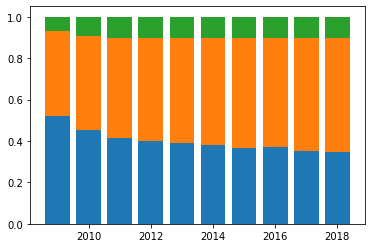

In [39]:
ind=fund_year.index
nofund=fund_year.not_funded.values
fund=fund_year.single_funded.values
intfund=fund_year.int_funded.values
plt.bar(ind,nofund)
plt.bar(ind,fund, bottom=nofund)
plt.bar(ind,intfund, bottom=nofund+fund)

In [5]:
fund_neither=[]
fund_either=[]
fund_both=[]
for index, row in pubs_author_funder.iterrows():
    funderlist=row['funder_country']
    if funderlist=='Not-Funded':
        funderlist=[]
    authorlist=row['author_country']
    authorlist.sort()
    rel_cit=row['rel_citation']
    authorcomb=combinations(authorlist,2)
    for cntry_a,cntry_b in set(authorcomb):
        if (cntry_a in funderlist) and (cntry_b in funderlist):
            fund_both.append([cntry_a,cntry_b,1,rel_cit])
            fund_both.append([cntry_b,cntry_a,1,rel_cit])
            if (cntry_a == cntry_b):
                fund_either.append([cntry_a,cntry_b,1,rel_cit])
        elif (cntry_a in funderlist) and (cntry_b not in funderlist):
            fund_either.append([cntry_a, cntry_b, 1,rel_cit])
        elif (cntry_a not in funderlist) and (cntry_b in funderlist):
            fund_either.append([cntry_b, cntry_a, 1,rel_cit])
        elif (cntry_a not in funderlist) and (cntry_b not in funderlist) and (len(funderlist)==0):
            fund_neither.append([cntry_a, cntry_b, 1,rel_cit])
            fund_neither.append([cntry_b, cntry_a, 1,rel_cit])  

In [7]:
def list2df(resultlist):
    df=pd.DataFrame(resultlist)
    df.columns=['source','target','count','rel_cit']
    df=df.groupby(['source','target']).agg({'count':'size','rel_cit':'mean'}).reset_index()
    return df

In [11]:
fund_neither_df=list2df(fund_neither)

In [27]:
fund_neither_df['count_log']=np.log10(fund_neither_df['count'])

In [28]:

fund_neither_cit = fund_neither_df.pivot(
    index="source",columns='target',values='count_log').fillna(0)
fund_neither_cit.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.857332,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.00000,0.00000,0.778151,...,1.845098,0.0,0.0,0.0,0.0,0.00000,0.602060,0.00000,0.00000,0.0
Albania,0.000000,2.758912,0.698970,0.00000,0.000000,0.0,0.0,0.30103,0.60206,1.000000,...,1.812913,0.0,0.0,0.0,0.0,0.00000,0.301030,0.00000,0.30103,0.0
Algeria,0.000000,0.698970,4.167613,0.00000,0.000000,0.0,0.0,1.30103,0.69897,1.707570,...,2.607455,0.0,0.0,0.0,0.0,0.90309,1.462398,0.69897,0.00000,0.0
Andorra,0.000000,0.000000,0.000000,0.30103,0.000000,0.0,0.0,0.00000,0.00000,0.000000,...,0.778151,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
Angola,0.000000,0.000000,0.000000,0.00000,1.763428,0.0,0.0,0.30103,0.00000,0.301030,...,1.361728,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0


In [33]:
fund_neither_df[(fund_neither_df.source=='China') &(fund_neither_df.target=='United States')]

,source,target,count,rel_cit,count_log
4447,China,United States,33186,1.309811,4.520955


In [23]:
fund_either_df=list2df(fund_either)
fund_either_df['count_log']=np.log10(fund_either_df['count'])
fund_either_cit = fund_either_df.pivot(
    index="source",columns='target',values='count_log').fillna(0)
fund_either_cit.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.60206,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.00000,2.941014,0.0,0.00000,0.0,0.0,0.30103,0.0,0.778151,...,1.477121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.00000,0.000000,0.0,0.69897,0.0,0.0,0.00000,0.0,0.602060,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
fund_both_df[(fund_both_df.source=='China') &(fund_both_df.target=='United States')]

,source,target,count,rel_cit,count_log
1403,China,United States,71180,1.970752,4.852358


In [30]:
fund_both_df=list2df(fund_both)
fund_both_df['count_log']=np.log10(fund_both_df['count'])
fund_both_cit = fund_both_df.pivot(
    index="source",columns='target',values='count_log').fillna(0)
fund_both_cit.head()

target,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Albania,0.90309,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
Algeria,0.00000,3.242044,0.0,0.0,0.301030,0.000000,1.041393,1.041393,0.000000,0.0,...,1.322219,1.255273,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
Andorra,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
Angola,0.00000,0.000000,0.0,1.0,0.000000,0.000000,0.301030,0.000000,0.000000,0.0,...,0.301030,0.845098,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
Argentina,0.00000,0.301030,0.0,0.0,4.680245,2.877371,2.979093,2.919601,2.880242,0.0,...,3.104828,3.521007,2.220108,0.0,0.0,1.361728,1.113943,0.0,0.0,0.0


In [15]:
cntry_cntry_df = pd.read_csv("..//..//..//data//Data//DerivedData//Derived//funding_source_target.csv")
cntry_cntry_df = cntry_cntry_df.pivot_table(
    index='source',columns='target', values='value', fill_value=0)
cntry_cntry_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.333333,...,2.299242,0.0,0.0,0.0,0.0,0.0,0.50,0.000000,0.0,0.0
Albania,0.0,8.833333,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.277778,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.00,0.000000,0.0,0.0
Algeria,0.0,0.000000,1706.342726,0.0,0.000000,0.0,0.0,3.92619,0.0,1.997885,...,21.937491,0.0,0.0,0.0,0.0,0.0,0.25,0.333333,0.0,0.0
Andorra,0.0,0.000000,0.000000,3.5,0.000000,0.0,0.0,0.00000,0.0,0.000000,...,3.900000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
Angola,0.0,0.000000,0.000000,0.0,20.581349,0.0,0.0,0.00000,0.0,2.650000,...,3.602381,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0


In [16]:
cntry_out = cntry_cntry_df.sum(axis=1).reset_index()
cntry_out.columns=['country','unit_out']
cntry_out=cntry_out.sort_values(by="unit_out", ascending=False)
cntry_out=cntry_out[cntry_out.country!="EU"]
top20_df=cntry_out.head(20)
cntry_top20=top20_df.country

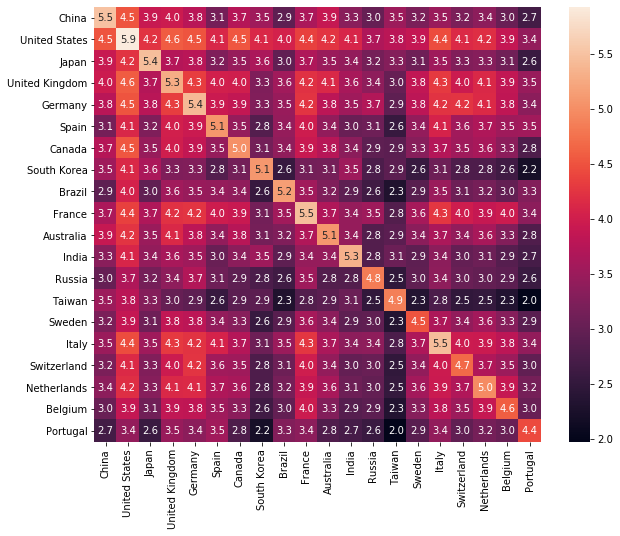

In [29]:
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(
    fund_neither_cit.loc[cntry_top20, cntry_top20].values, annot=True,
    fmt=".1f",xticklabels=cntry_top20, yticklabels=cntry_top20)
plt.savefig("neither_count.pdf", format="pdf",bbox_inches="tight")

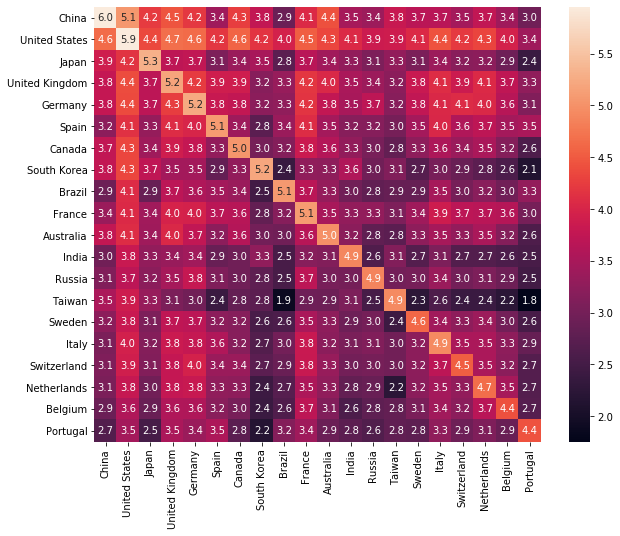

In [24]:
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(
    fund_either_cit.loc[cntry_top20, cntry_top20].values, annot=True,
    fmt=".1f",xticklabels=cntry_top20, yticklabels=cntry_top20)
plt.savefig("either_count.pdf", format="pdf",bbox_inches="tight")

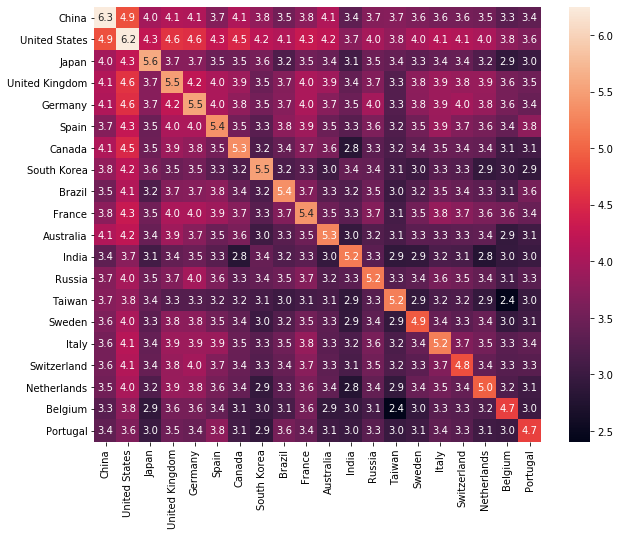

In [31]:
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(
    fund_both_cit.loc[cntry_top20, cntry_top20].values, annot=True,
    fmt=".1f",xticklabels=cntry_top20, yticklabels=cntry_top20)
plt.savefig("both_count.pdf",format="pdf",bbox_inches="tight")

In [40]:
fund_neither_df.loc[cntry_top30,cntry_top30]

target,China,United States,Japan,United Kingdom,Germany,Spain,Canada,South Korea,Brazil,France,...,Finland,Denmark,Czech Republic,Poland,Mexico,Argentina,Iran,Austria,Singapore,Turkey
source,,,,,,,,,,,,,,,,,,,,,
China,0.771529,1.470438,2.136686,2.335000,2.794209,4.890460,2.893518,2.870084,4.955552,3.045382,...,5.448010,4.283262,4.486206,4.184913,7.419656,7.869900,4.254946,4.821038,2.437302,4.346216
United States,1.470438,1.215455,1.800695,2.046846,2.006255,2.279289,1.954454,1.564298,1.677451,2.204230,...,2.606418,2.607909,2.390978,1.936313,1.557982,2.205326,1.449913,2.307456,2.045724,1.284590
Japan,2.136686,1.800695,0.756987,3.068959,3.037553,4.526093,3.929900,2.438956,5.037528,3.125374,...,5.143491,5.007784,3.621959,3.356306,6.560622,7.083661,3.974946,4.472903,3.737105,3.937410
United Kingdom,2.335000,2.046846,3.068959,1.525998,2.430269,2.810119,3.296398,4.324104,3.186896,2.611570,...,3.416376,3.011967,2.985995,2.663615,4.005984,4.424559,2.065566,2.939438,2.867329,2.632527
Germany,2.794209,2.006255,3.037553,2.430269,1.288966,3.079749,3.549345,4.313780,3.076805,2.583008,...,3.284605,3.049231,2.666125,2.376505,4.640294,4.311431,2.237898,2.073781,4.596035,2.546478
Spain,4.890460,2.279289,4.526093,2.810119,3.079749,1.263101,4.864975,7.582413,3.324503,2.982876,...,4.632455,4.099484,3.792715,3.599200,2.738522,3.187033,3.849346,3.932149,7.353031,3.821289
Canada,2.893518,1.954454,3.929900,3.296398,3.549345,4.864975,1.601157,5.515359,3.641990,3.321890,...,5.651166,4.823795,5.070945,4.386273,5.080316,5.622417,1.836942,4.631359,4.472740,3.844893
South Korea,2.870084,1.564298,2.438956,4.324104,4.313780,7.582413,5.515359,0.801748,8.040587,4.864729,...,9.748671,9.040621,4.956590,6.882721,10.099483,11.274740,4.745655,7.486619,4.220438,6.195636
Brazil,4.955552,1.677451,5.037528,3.186896,3.076805,3.324503,3.641990,8.040587,0.643476,2.896431,...,6.678578,6.008680,6.158383,5.788875,3.610089,2.870007,7.466791,4.623134,8.072415,6.387015


In [63]:
idlist=[]
for index, row in coll_filter.iterrows():
    funderlist=row['funder_country']
    if funderlist==0:
        funderlist=[]
    authorlist=row['author_country']
    cntry_a="Taiwan"
    cntry_b="Portugal"
    if (cntry_a in authorlist)&(cntry_b in authorlist):
        if (cntry_a not in funderlist)&(cntry_b not in funderlist):
            idlist.append(index)
            

In [80]:

test_df = coll_filter.loc[idlist,:]
test_df = test_df[test_df.funded==0]
test_df = test_df.sort_values(by="rel_citation", ascending=False)
test_df.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,funded,coll
10696869,53898829,"[Australia, Canada, China, China, Colombia, Ic...",0,44,2015,196.759,2065,0,1
11323116,56814654,"[Argentina, Australia, Belgium, Belgium, Brazi...",0,15,2016,147.286,1584,0,1
11827096,60164240,"[Brazil, Finland, Italy, Qatar, Turkey, Turkey...",0,78,2017,36.977,121,0,1
11176671,56022041,"[Taiwan, Canada, Portugal, China]",0,88,2016,19.846,70,0,1
8539212,44787868,"[France, Switzerland, Taiwan, United States, P...",0,7,2010,18.593,182,0,1
